In [7]:
import numpy as np 

def bce_p(p, y, eps=1e-7, reduction='mean'):
    p = np.clip(p, eps, 1-eps)
    loss = -(y*np.log(p) + (1-y)*np.log(1-p))

    if reduction == 'mean':
        return loss.mean()
    elif reduction == 'sum':
        return loss.sum()
    else:
        return loss

In [ ]:
def bce_logits(z,y):
    loss = np.maximum(z,0) - z * y + np.log(1+np.exp(-np.abs(z)))

# Binary Cross-Entropy (BCE): Quick Guide

### When to use
- Binary targets $y\in\{0,1\}$ or **multi-label** (independent classes).
- Minimizes the **negative log-likelihood (NLL)** of a Bernoulli model → calibrated probabilities.

### Definitions
- **Probability form (per example):**  
  $$L(p,y) = -\big[\, y\log p + (1-y)\log(1-p) \,\big], \qquad 0 \le p \le 1$$

- **Logit → probability:**  
  $$p=\sigma(z)=\frac{1}{1+e^{-z}}$$

- **Stable logits form (preferred):**  
  $$L(z,y)=\max(z,0)\;-\;z\,y\;+\;\log\!\big(1+e^{-|z|}\big)$$

### Gradients (memorize)
- $$\frac{\partial L}{\partial p} = -\frac{y}{p} + \frac{1-y}{1-p}$$
- Using $\displaystyle \frac{dp}{dz}=p(1-p)$,  
  $$\frac{\partial L}{\partial z} = \sigma(z) - y = p - y$$
- If $z=w^\top x + b$:  
  $$\frac{\partial L}{\partial w}=(p-y)x, \qquad \frac{\partial L}{\partial b}=p-y$$

### Practical
- Prefer the **logits form** to avoid numerical issues; if using probabilities, clip $p$ to $[\varepsilon,\,1-\varepsilon]$ (e.g., $10^{-7}$).
- **Reductions** change scaling: `"mean"` (default), `"sum"`, or `"none"`.
- **Class imbalance:** use class weights / `pos_weight`; tune decision thresholds per class at inference.


In [2]:
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def bce_prob(p, y, eps=1e-7, reduction="mean"):
    # BCE given probabilities p (already in [0,1]).
    p = np.clip(p, eps, 1.0 - eps)
    loss = -(y * np.log(p) + (1 - y) * np.log(1 - p))
    if reduction == "mean":
        return loss.mean()
    elif reduction == "sum":
        return loss.sum()
    return loss



def bce_logits(z, y, reduction="mean"):
    # Numerically stable BCE from logits (preferred).
    loss = np.maximum(z, 0) - z * y + np.log1p(np.exp(-np.abs(z)))
    if reduction == "mean":
        return loss.mean()
    elif reduction == "sum":
        return loss.sum()
    return loss



In [3]:
def bce_prob_grad_wrt_p(p, y, eps=1e-7, reduction="mean"):
    p = np.clip(p, eps, 1.0 - eps)
    grad = -(y / p) + ((1 - y) / (1 - p))  # dL/dp
    if reduction == "mean":
        return grad / grad.size
    elif reduction == "sum":
        return grad
    return grad


def bce_logits_grad_wrt_z(z, y, reduction="mean"):
    p = sigmoid(z)
    grad = p - y  # dL/dz
    if reduction == "mean":
        return grad / grad.size
    elif reduction == "sum":
        return grad
    return grad

In [4]:
rng = np.random.default_rng(0)
N, C = 6, 3
z = rng.normal(size=(N, C))
y = (rng.random((N, C)) > 0.5).astype(float)

p = sigmoid(z)
loss_prob = bce_prob(p, y, reduction="mean")
loss_logits = bce_logits(z, y, reduction="mean")
print("Mean loss (prob form):   ", float(loss_prob))
print("Mean loss (logits form): ", float(loss_logits))
print("Abs diff:                ", abs(float(loss_prob) - float(loss_logits)))

dz = bce_logits_grad_wrt_z(z, y, reduction="none")
print("dL/dz stats -> min/mean/max:", dz.min(), dz.mean(), dz.max())

Mean loss (prob form):    0.9176664043790049
Mean loss (logits form):  0.9176664043790049
Abs diff:                 0.0
dL/dz stats -> min/mean/max: -0.9109289692696478 -0.11516747599264177 0.7205277573984006


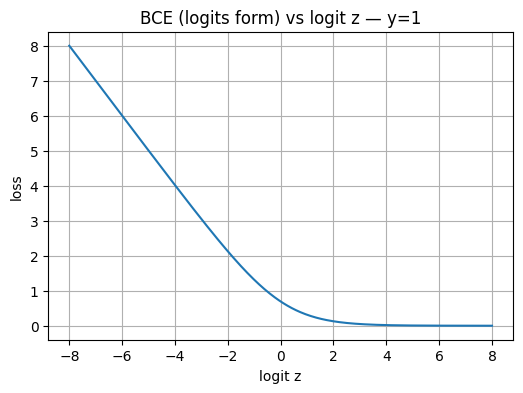

In [5]:
import matplotlib.pyplot as plt
z_axis = np.linspace(-8, 8, 400)
y1 = np.ones_like(z_axis)
L1 = bce_logits(z_axis, y1, reduction="none")

plt.figure(figsize=(6,4))
plt.plot(z_axis, L1)
plt.title("BCE (logits form) vs logit z — y=1")
plt.xlabel("logit z")
plt.ylabel("loss")
plt.grid(True)
plt.show()

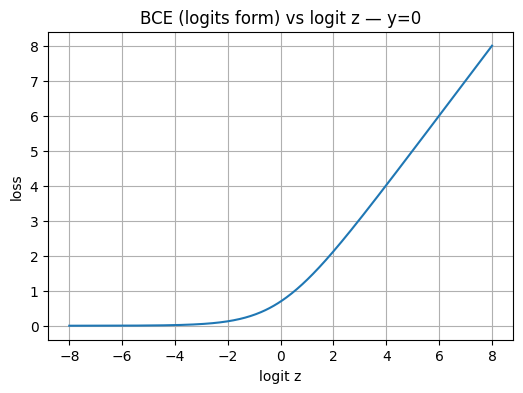

In [6]:
import matplotlib.pyplot as plt
z_axis = np.linspace(-8, 8, 400)
y0 = np.zeros_like(z_axis)
L0 = bce_logits(z_axis, y0, reduction="none")

plt.figure(figsize=(6,4))
plt.plot(z_axis, L0)
plt.title("BCE (logits form) vs logit z — y=0")
plt.xlabel("logit z")
plt.ylabel("loss")
plt.grid(True)
plt.show()
